Im# Cleaning and preprocessing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('medical_students_dataset.csv')

In [4]:
df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


In [5]:
df.shape

(200000, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [14]:
df.describe()

,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,200000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,100000.500000,26.021561,174.947103,69.971585,23.338869,98.600948,79.503767,114.558033,184.486361
std,57735.171256,4.890528,14.447560,17.322574,7.033554,0.500530,11.540755,14.403353,37.559678
min,1.000000,18.000000,150.000041,40.000578,10.074837,96.397835,60.000000,90.000000,120.000000
25%,50000.750000,22.000000,162.476110,54.969838,17.858396,98.264750,70.000000,102.000000,152.000000
50%,100000.500000,26.000000,174.899914,69.979384,22.671401,98.599654,80.000000,115.000000,184.000000
75%,150000.250000,30.000000,187.464417,84.980097,27.997487,98.940543,90.000000,127.000000,217.000000
max,200000.000000,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,139.000000,249.000000


# 1. Filling missing data

In [8]:
df.duplicated().sum()

7644

In [9]:
df.isna().mean() * 100

Student ID        10.0
Age               10.0
Gender            10.0
Height            10.0
Weight            10.0
Blood Type        10.0
BMI               10.0
Temperature       10.0
Heart Rate        10.0
Blood Pressure    10.0
Cholesterol       10.0
Diabetes          10.0
Smoking           10.0
dtype: float64

<Axes: >

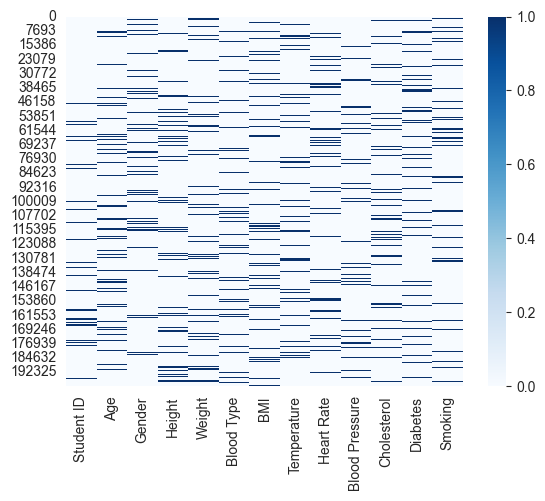

In [10]:
sns.heatmap(data = df.isna(), cmap ='Blues')

# 1.1 Filling missing numerical features

In [11]:
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [12]:
df['Student ID'] = np.arange(1, len(df) + 1, dtype='float64')
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,4.0,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [15]:
numerical_features = df.describe().columns[1:].drop('BMI')
numerical_features

Index(['Age', 'Height', 'Weight', 'Temperature', 'Heart Rate',
       'Blood Pressure', 'Cholesterol'],
      dtype='object')

In [16]:
from sklearn.impute import SimpleImputer

simp_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
for col in numerical_features:
    df[col] = simp_imputer.fit_transform(df[col].values.reshape(-1, 1))
df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,98.599654,95.0,109.0,203.0,No,NaN
1,2.0,26.0,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,4.0,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,174.899914,46.234173,O,NaN,98.480008,95.0,115.0,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996.0,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,199997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,199998.0,34.0,Female,174.899914,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,199999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


In [17]:
df['BMI'] = (df['Weight'] / pow(df['Height'], 2)) * 10000

In [18]:
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,98.599654,95.0,109.0,203.0,No,NaN
1,2.0,26.0,Male,152.069157,47.630941,B,20.597139,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,4.0,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,174.899914,46.234173,O,15.114156,98.480008,95.0,115.0,231.0,No,No


* we have completely filled the missing numerical features of the dataset

<Axes: >

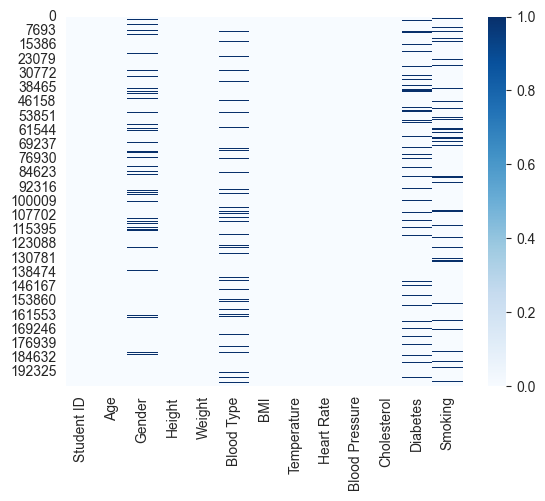

In [19]:
sns.heatmap(data = df.isna(), cmap ='Blues')

# 1.2 Filling non-numerical features

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      200000 non-null  float64
 1   Age             200000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          200000 non-null  float64
 4   Weight          200000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             200000 non-null  float64
 7   Temperature     200000 non-null  float64
 8   Heart Rate      200000 non-null  float64
 9   Blood Pressure  200000 non-null  float64
 10  Cholesterol     200000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


* Cuz non-numerical features in this dataset is like-categorical features(Gender, Blood Type,..), we call them categorical features

In [21]:
categorical_features = df.columns.drop(df.describe().columns)
categorical_features

Index(['Gender', 'Blood Type', 'Diabetes', 'Smoking'], dtype='object')

<Axes: xlabel='Smoking', ylabel='Count'>

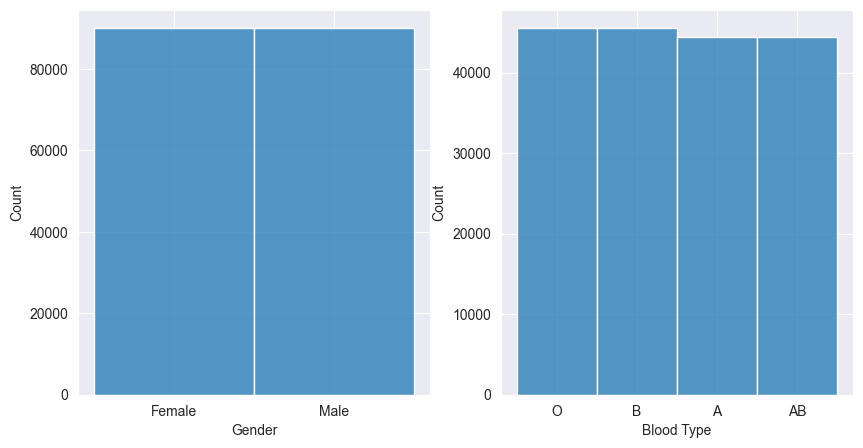

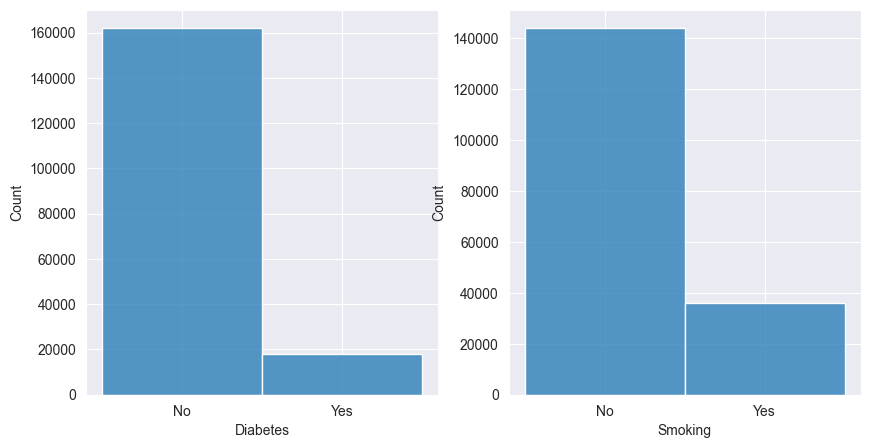

In [22]:
fig = plt.figure(figsize=(10, 5))
fig.add_subplot(1, 2, 1)
sns.histplot(data=df, x="Gender")
fig.add_subplot(1, 2, 2)
sns.histplot(data=df, x="Blood Type")
fig = plt.figure(figsize=(10, 5))
fig.add_subplot(1, 2, 1)
sns.histplot(data=df, x="Diabetes")
fig.add_subplot(1, 2, 2)
sns.histplot(data=df, x="Smoking")

### Cuz the NaN categorical features are quite large, we cannot fill them by most frequent values. Instead, we'd better build a machine learning model based on the numerical features to predict the categorical features. That may ensure the accuracy and consistence for the dataset

* Prepare data for training machine leaning process

In [74]:
df = df.dropna()

In [75]:
df[categorical_features]

,Gender,Blood Type,Diabetes,Smoking
1,Male,B,No,No
2,Female,A,Yes,No
3,Male,B,No,Yes
4,Female,O,No,No
7,Male,AB,No,No
...,...,...,...,...
199991,Male,A,No,No
199992,Male,B,No,No
199993,Male,A,Yes,No
199995,Male,B,No,No


* Encode categorical features

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder



OH_encoder = OneHotEncoder(drop='first', sparse_output = False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[categorical_features]))

OH_cols.index = df[categorical_features].index
OH_cols.columns = ['Gender male', 'Blood Type AB', 'Blood Type B', 'Blood Type 0', 'Diabetes yes', 'Smoking yes']
# Remove categorical columns (will replace with one-hot encoding)
num = df[numerical_features]

OH_df = pd.concat([num, OH_cols], axis=1)

OH_df

,Age,Height,Weight,Temperature,Heart Rate,Blood Pressure,Cholesterol,Gender male,Blood Type AB,Blood Type B,Blood Type 0,Diabetes yes,Smoking yes
1,26.0,152.069157,47.630941,98.714977,93.0,104.0,163.0,1.0,0.0,1.0,0.0,0.0,0.0
2,32.0,182.537664,55.741083,98.260293,76.0,130.0,216.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30.0,182.112867,63.332207,98.839605,99.0,112.0,141.0,1.0,0.0,1.0,0.0,0.0,1.0
4,23.0,174.899914,46.234173,98.480008,95.0,115.0,231.0,0.0,0.0,0.0,1.0,0.0,0.0
7,28.0,186.489402,52.389752,98.227788,85.0,123.0,128.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199991,28.0,183.499177,69.979384,97.321680,70.0,113.0,140.0,1.0,0.0,0.0,0.0,0.0,0.0
199992,34.0,161.590030,90.877589,98.728836,70.0,96.0,208.0,1.0,0.0,1.0,0.0,0.0,0.0
199993,22.0,174.899914,46.155224,98.331019,93.0,100.0,184.0,1.0,0.0,0.0,0.0,1.0,0.0
199995,24.0,176.503260,95.756997,99.170685,65.0,121.0,130.0,1.0,0.0,1.0,0.0,0.0,0.0


In [78]:
OH_df.columns

Index(['Age', 'Height', 'Weight', 'Temperature', 'Heart Rate',
       'Blood Pressure', 'Cholesterol', 'Gender male', 'Blood Type AB',
       'Blood Type B', 'Blood Type 0', 'Diabetes yes', 'Smoking yes'],
      dtype='object')

In [81]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler  

pd.DataFrame(data = StandardScaler().fit_transform(OH_df[OH_df.columns[:-1]]), columns=OH_df.columns[:-1]).head()

,Age,Height,Weight,Temperature,Heart Rate,Blood Pressure,Cholesterol,Gender male,Blood Type AB,Blood Type B,Blood Type 0,Diabetes yes
0,-0.007044,-1.666349,-1.359613,0.239538,1.229428,-0.776428,-0.600928,1.001075,-0.572826,1.719397,-0.581775,-0.332440
1,1.285268,0.556325,-0.866349,-0.718241,-0.324131,1.123854,0.884368,-0.998926,-0.572826,-0.581599,-0.581775,3.008065
2,0.854497,0.525337,-0.404651,0.502063,1.777743,-0.191725,-1.217465,1.001075,-0.572826,1.719397,-0.581775,-0.332440
3,-0.653200,-0.000848,-1.444565,-0.255418,1.412200,0.027538,1.304735,-0.998926,-0.572826,-0.581599,1.718877,-0.332440
4,0.423726,0.844604,-1.070179,-0.786712,0.498341,0.612240,-1.581783,1.001075,1.745732,-0.581599,-0.581775,-0.332440


In [82]:
pd.DataFrame(data = MinMaxScaler().fit_transform(OH_df[OH_df.columns[:-1]]), columns=OH_df.columns[:-1]).head()

,Age,Height,Weight,Temperature,Heart Rate,Blood Pressure,Cholesterol,Gender male,Blood Type AB,Blood Type B,Blood Type 0,Diabetes yes
0,0.5000,0.041383,0.127174,0.523409,0.846154,0.285714,0.333333,1.0,0.0,1.0,0.0,0.0
1,0.8750,0.650771,0.262345,0.420702,0.410256,0.816327,0.744186,0.0,0.0,0.0,0.0,1.0
2,0.7500,0.642275,0.388865,0.551560,1.000000,0.448980,0.162791,1.0,0.0,1.0,0.0,0.0
3,0.3125,0.498011,0.103894,0.470333,0.897436,0.510204,0.860465,0.0,0.0,0.0,1.0,0.0
4,0.6250,0.729808,0.206489,0.413360,0.641026,0.673469,0.062016,1.0,1.0,0.0,0.0,0.0
